In [1]:
!pip install opencv-python

In [19]:
import matplotlib.pyplot as plt
import cv2
import skimage
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering

def draw_picture(image, title, bgr=True):
    if bgr:
        b, g, r = cv2.split(image)
        image = cv2.merge([r, g, b])

    plt.figure(figsize=(7, 5))
    plt.axis('off')
    plt.imshow(image)
    plt.title(title)
    plt.show()

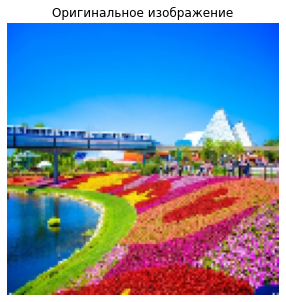

In [20]:
img = cv2.imread('feml.jpg')
img = cv2.resize(img, (128, 128))
draw_picture(img, 'Оригинальное изображение', bgr=True)

In [21]:
import numpy as np
img_data = np.array(img)
pixels = img_data.reshape((img_data.shape[0] * img_data.shape[1], img_data.shape[2]))
pixels.shape

(16384, 3)

In [55]:
from skimage.metrics import structural_similarity as ssim

def kmeans_iter(n):
  kmeans = KMeans(n_clusters=n, random_state=42)
  claster_label = kmeans.fit_predict(pixels)
  centers = kmeans.cluster_centers_.astype(int)
  map1 = np.array([centers[x] for x in claster_label])
  new_array = np.reshape(map1, (128, 128,3))
  b, g, r = cv2.split(new_array)
  new_array = cv2.merge([r, g, b])
  res = ssim(img, new_array, multichannel=True, data_range=new_array.max() - new_array.min())
  plt.title('KMeans, kоличество кластеров: {}\n SSIM = {}'.format(n,round(res,2)))
  plt.imshow(new_array)


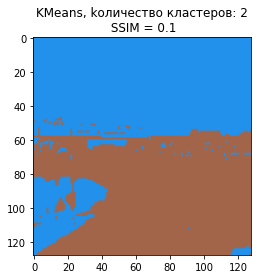

In [56]:
kmeans_iter(2)

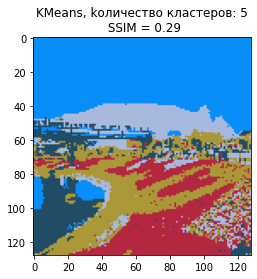

In [57]:
kmeans_iter(5)

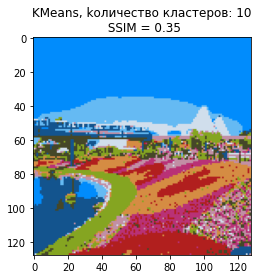

In [58]:
kmeans_iter(10)

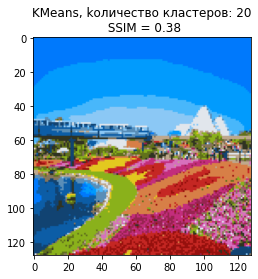

In [59]:
kmeans_iter(20)

In [60]:
dbscan = DBSCAN(eps=0.5)
preds = dbscan.fit_predict(pixels)

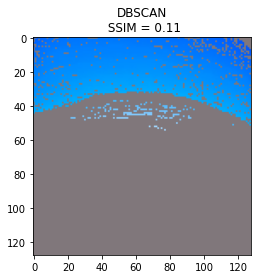

In [61]:
import pandas as pd
pr = pd.DataFrame(preds)
px = pd.DataFrame(pixels)
p = px.merge(pr, left_index=True, right_index=True)
p.rename(columns={'0_x':0,'0_y':'y'}, inplace=True)
p[[0,1,2]] = p.groupby('y')[[0,1,2]].transform('mean').astype(int)
p1 = np.array(p[[0,1,2]])
new_array = np.reshape(p1, (128, 128,3))
b, g, r = cv2.split(new_array)
new_array = cv2.merge([r, g, b])
res = ssim(img, new_array, multichannel=True, data_range=new_array.max() - new_array.min())
plt.title('DBSCAN\n SSIM = {}'.format(round(res,2)))
plt.imshow(new_array)

In [62]:
def aggcluster_iter(n):
  model = AgglomerativeClustering(n_clusters=n)
  preds = model.fit_predict(pixels)
  pr = pd.DataFrame(preds)
  px = pd.DataFrame(pixels)
  p = px.merge(pr, left_index=True, right_index=True)
  p.rename(columns={'0_x':0,'0_y':'y'}, inplace=True)
  p[[0,1,2]] = p.groupby('y')[[0,1,2]].transform('mean').astype(int)
  p1 = np.array(p[[0,1,2]])
  new_array = np.reshape(p1, (128, 128,3))
  b, g, r = cv2.split(new_array)
  new_array = cv2.merge([r, g, b])
  res = ssim(img, new_array, multichannel=True, data_range=new_array.max() - new_array.min())
  plt.title('Agglomerative Clustering, kоличество кластеров: {}\n SSIM = {}'.format(n,round(res,2)))
  plt.imshow(new_array)


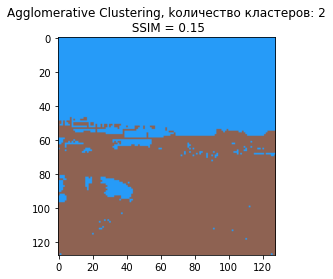

In [63]:
aggcluster_iter(2)

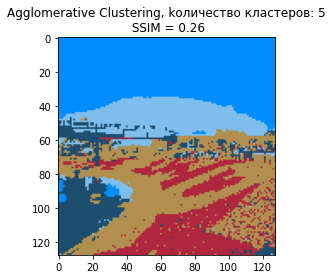

In [64]:
aggcluster_iter(5)

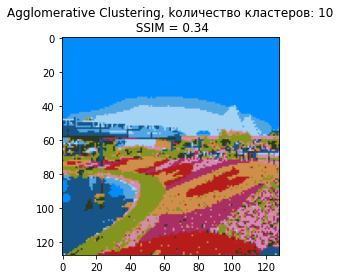

In [65]:
aggcluster_iter(10)

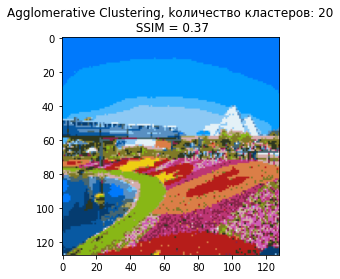

In [66]:
aggcluster_iter(20)

На рассматриваемых данных лучший результат показал KMeans. Он же оказался и самым быстрым алгоритмом.